In [1]:

from matplotlib.pyplot import *
import numpy as np
import pandas as pd
import os
from copy import copy
from ATARI.sammy_interface import sammy_classes, sammy_functions, template_creator

from ATARI.ModelData.particle_pair import Particle_Pair
from ATARI.ModelData.experimental_model import Experimental_Model

from ATARI.AutoFit import elim_addit_funcs


In [2]:
%matplotlib widget

In [95]:
import pickle


sammypath = "/Users/noahwalton/gitlab/sammy/sammy/build/bin/sammy"

#%% 
# import bad cases

bad_case_dir = "/Users/noahwalton/research_local/resonance_fitting/ATARI_workspace/IFB_failed_cases/bad_cases_for_Noah_check"
bad_cases_ids = [190, 268, 105, 372, 127]

initialFB = []
true = []
batch_after_initialFB_0011 = []
batch_during_initialFB_0101 = []
batch_after_initialFB_0101 = []
batch_during_initialFB_0011 = []
batch_during_initialFB_30p = []
batch_during_initialFB_50p = []
for case_id in bad_cases_ids: #= 372

    case_filename = f'sample_{case_id}.pkl'
    gen_params_filename =  f'params_gen.pkl'

    # loading case
    sample_data = elim_addit_funcs.load_obj_from_pkl(folder_name = bad_case_dir,
                                                        pkl_fname = case_filename )

    params_loaded = elim_addit_funcs.load_obj_from_pkl(folder_name = bad_case_dir,
                                                        pkl_fname= gen_params_filename)

    filehandler = open(f"/Users/noahwalton/Documents/GitHub/ATARI/examples/Ta181_Analysis/initialFB_{case_id}.pkl","rb")
    initialFB.append(pickle.load(filehandler))
    filehandler.close()

    filehandler = open(f"/Users/noahwalton/Documents/GitHub/ATARI/examples/Ta181_Analysis/true_{case_id}.pkl", 'rb')
    true.append(pickle.load(filehandler))
    filehandler.close()

    filehandler = open(f"/Users/noahwalton/Documents/GitHub/ATARI/examples/Ta181_Analysis/samout_{case_id}.pkl", 'rb')
    batch_after_initialFB_0011.append(pickle.load(filehandler))
    filehandler.close()

    # filehandler = open(f"/Users/noahwalton/Documents/GitHub/ATARI/examples/Ta181_Analysis/initialFB_{case_id}_inLM.pkl", 'rb')
    # batch_during_initialFB.append(pickle.load(filehandler))
    batch_during_initialFB_0101.append(pd.read_pickle(f"/Users/noahwalton/Documents/GitHub/ATARI/examples/Ta181_Analysis/initialFB_{case_id}_inLM.pkl"))
    # filehandler.close()

    filehandler = open(f"/Users/noahwalton/Documents/GitHub/ATARI/examples/Ta181_Analysis/initialFB_{case_id}_0011_inLM.pkl", 'rb')
    batch_during_initialFB_0011.append(pickle.load(filehandler))
    filehandler.close()

    filehandler = open(f"/Users/noahwalton/Documents/GitHub/ATARI/examples/Ta181_Analysis/initialFB_{case_id}_30p_inLM.pkl", 'rb')
    batch_during_initialFB_30p.append(pickle.load(filehandler))
    filehandler.close()

    filehandler = open(f"/Users/noahwalton/Documents/GitHub/ATARI/examples/Ta181_Analysis/initialFB_{case_id}_50p_inLM.pkl", 'rb')
    batch_during_initialFB_50p.append(pickle.load(filehandler))
    filehandler.close()


Text(0.5, 1.0, 'Performance Comparison Batching')

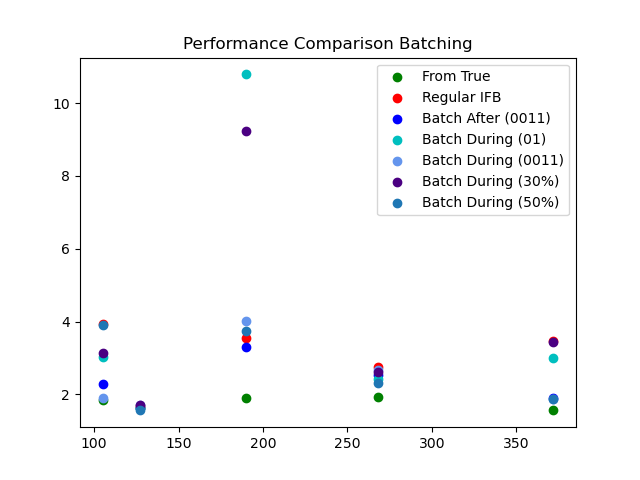

In [96]:
ndat = np.sum([len(each) for each in true[0].pw_post])


figure()


scatter(bad_cases_ids, [np.sum(t.chi2_post)/ndat for t in true], 
                                        label='From True', color='g')

scatter(bad_cases_ids, [np.sum(r.sammy_outs_fit_2[-1].chi2_post)/ndat for r in initialFB],
                                         label='Regular IFB', color='r')

scatter(bad_cases_ids, [np.sum(b.chi2_post)/ndat for b in batch_after_initialFB_0011], 
                                        label='Batch After (0011)', color='b')

scatter(bad_cases_ids, [np.sum(r.sammy_outs_fit_2[-1].chi2_post)/ndat for r in batch_during_initialFB_0101], 
                                        label='Batch During (01)', color='c')

scatter(bad_cases_ids, [np.sum(r.sammy_outs_fit_2[-1].chi2_post)/ndat for r in batch_during_initialFB_0011], 
                                        label='Batch During (0011)', color='cornflowerblue')

scatter(bad_cases_ids, [np.sum(r.sammy_outs_fit_2[-1].chi2_post)/ndat for r in batch_during_initialFB_30p], 
                                        label='Batch During (30%)', color='indigo')

scatter(bad_cases_ids, [np.sum(r.sammy_outs_fit_2[-1].chi2_post)/ndat for r in batch_during_initialFB_50p], 
                                        label='Batch During (50%)')#, color='indigo')



legend()
# yscale('log')
title('Performance Comparison Batching')

In [92]:
bad_cases_ids = [190, 268, 105, 372, 127]
case_id = 190

case_filename = f'sample_{case_id}.pkl'
gen_params_filename =  f'params_gen.pkl'

# loading case
sample_data = elim_addit_funcs.load_obj_from_pkl(folder_name = bad_case_dir,
                                                    pkl_fname = case_filename )

params_loaded = elim_addit_funcs.load_obj_from_pkl(folder_name = bad_case_dir,
                                                    pkl_fname= gen_params_filename)

### define new particle pair for updated version
syndat_loaded = params_loaded
# Ta_pair_loaded = syndat_loaded.particle_pair
# Ta_pair = Ta_pair_loaded
Ta_pair = Particle_Pair()
Ta_pair.add_spin_group(Jpi='3.0',
                       J_ID=1,
                       D=9.0030,
                       gn2_avg=452.56615,
                       gn2_dof=1,
                       gg2_avg=32.0,
                       gg2_dof=1000)

Ta_pair.add_spin_group(Jpi='4.0',
                       J_ID=2,
                       D=8.3031,
                       gn2_avg=332.24347, 
                       gn2_dof=1,
                       gg2_avg=32.0,
                       gg2_dof=1000)


### udpate experiment template
for synmod in syndat_loaded.syndat_models:
    exp = synmod.generative_experimental_model
    filepath = os.path.realpath(f'./data/template_{exp.title}_edited_oldres')
    exp.template = os.path.realpath(filepath)


#%%
import plotting as myplot
from copy import deepcopy
from ATARI.AutoFit.initial_FB_solve import InitialFB, InitialFBOPT

sammy_rto_fit = sammy_classes.SammyRunTimeOptions(sammypath,
                                        {"Print":   True,
                                         "bayes":   True,
                                         "keep_runDIR": True,
                                         "sammy_runDIR": "sammy_runDIR"
                                         })


options = InitialFBOPT(Gn_threshold=1e-1,
                       iterations=2,
                       max_steps = 30,
                       LevMarV0=0.05,
                       batch_fitpar = True,
                       fit_all_spin_groups=False,
                       spin_group_keys = ['3.0'],
                       step_threshold=0.001,
                       starting_Gn1_multiplier = 20,
                       num_Elam=50,
                       external_resonances=False)
autofit_initial = InitialFB(options)



datasets = [val.pw_reduced for key, val in sample_data.items()]
experiments = [synmod.generative_experimental_model for synmod in syndat_loaded.syndat_models]
covariance_data = [{} for key, val in sample_data.items()]


In [93]:

outs = autofit_initial.fit(Ta_pair,
                               [202, 227],
                               datasets,
                               experiments,
                               covariance_data,
                               sammy_rto_fit)

# filehandler = open(f"/Users/noahwalton/Documents/GitHub/ATARI/examples/Ta181_Analysis/initialFB_{case_id}_50p_inLM.pkl","rb")
# outs = pickle.load(filehandler)


	FIT 1
Initial solve from 50 resonance features

Stepping until convergence
chi2 values
step fudge: ['trans1mm', 'trans3mm', 'trans6mm', 'cap1mm', 'cap2mm', 'sum', 'sum/ndat']
0    0.05 : [552186.0, 1252298.0, 1438173.0, 7944.2, 9747.9, 3260349.1, 3844.7513]
1    0.075: [210949.0, 157721.0, 98092.1, 2665.59, 3962.9, 473390.59, 558.2436]
2    0.113: [127556.0, 48779.6, 23388.4, 2508.0, 3510.94, 205742.94, 242.6214]
3    0.169: [2782.79, 1466.69, 1832.26, 2183.3, 2791.92, 11056.96, 13.0389]
4    0.253: [1526.31, 1299.11, 1697.4, 2016.66, 2643.26, 9182.74, 10.8287]
Repeat step 5, 	fudge: ['trans1mm', 'trans3mm', 'trans6mm', 'cap1mm', 'cap2mm', 'sum', 'sum/ndat']
		0.253: [1501.18, 1278.05, 1642.24, 2158.41, 2906.67, 9486.55, 11.187]
		0.051: [1496.31, 1305.86, 1691.45, 2024.4, 2671.3, 9189.32, 10.8365]
		0.01 : [1544.76, 1314.49, 1706.58, 2014.76, 2643.61, 9224.2, 10.8776]
		0.002: [1527.49, 1300.0, 1697.94, 2016.54, 2643.25, 9185.22, 10.8316]
		0.0  : [1526.3, 1299.09, 1697.4, 2016.68, 2

In [70]:
outs.sammy_outs_fit_2[-1].chi2_post

[1424.33, 1176.72, 1397.07, 1507.57, 2333.58]

In [71]:

true_par = deepcopy(sample_data['trans1mm'].par_true)
true_par['varyE'] = np.ones(len(true_par))
true_par['varyGg'] = np.ones(len(true_par))
true_par['varyGn1'] = np.ones(len(true_par))

sammyINPyw = sammy_classes.SammyInputDataYW(
        particle_pair = Ta_pair,
        resonance_ladder = true_par,  

        datasets= datasets,
        experiments = experiments,
        experimental_covariance= covariance_data, 
        
        max_steps = 5,
        iterations = 2,
        step_threshold = 0.001,
        LevMar = True,
        LevMarV = 1.5,
        LevMarVd = 5,
        minF = 1e-5,
        maxF = 2.0,
        initial_parameter_uncertainty = 0.1,
        
        autoelim_threshold = None,
        LS = False,
        )

true_out = sammy_functions.run_sammy_YW(sammyINPyw, sammy_rto_fit)

# figure()
# _ = hist(np.log10(ending_parameters.Gn1), bins=50)

Stepping until convergence
chi2 values
step fudge: ['trans1mm', 'trans3mm', 'trans6mm', 'cap1mm', 'cap2mm', 'sum', 'sum/ndat']
0    0.1  : [494.761, 358.491, 234.689, 239.786, 377.976, 1705.703, 2.0114]
1    0.15 : [430.262, 306.669, 251.385, 242.329, 373.993, 1604.638, 1.8923]
2    0.225: [429.343, 308.093, 249.71, 241.994, 373.665, 1602.805, 1.8901]
Repeat step 3, 	fudge: ['trans1mm', 'trans3mm', 'trans6mm', 'cap1mm', 'cap2mm', 'sum', 'sum/ndat']
		0.225: [429.307, 308.802, 249.185, 241.862, 373.652, 1602.808, 1.8901]
		0.045: [429.356, 308.239, 249.584, 241.957, 373.656, 1602.792, 1.8901]
3    0.045: [429.356, 308.239, 249.584, 241.957, 373.656, 1602.792, 1.8901]
Chi2 improvement below threshold


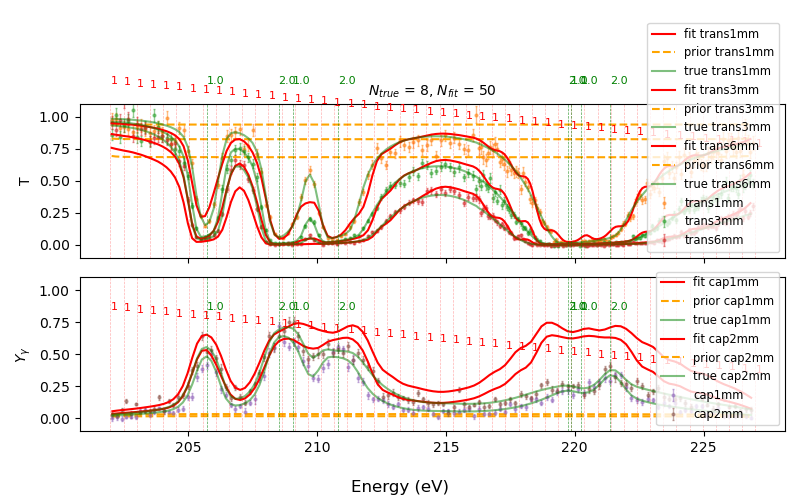

In [94]:
fit = outs.sammy_outs_fit_1[-1]

fig = myplot.plot_datafits(datasets,
                     experiments,
                     fits = fit.pw_post,
                     fit_pars = fit.par_post,
                     fig_size=(8,5),
                     true= true_out.pw_post,
                     true_pars = true_out.par_post,
                     priors=fit.pw,
                    #  prior_pars=true_out.par
                     )
fig.tight_layout()

In [88]:
fit.par_post

,E,Gg,Gn1,varyE,varyGg,varyGn1,J_ID
0,205.565558,64.0,23.917388,0.0,0.0,1.0,1.0
1,206.076084,64.0,11.185049,0.0,0.0,0.0,1.0
2,206.586611,64.0,0.143906,0.0,0.0,1.0,1.0
3,208.118190,64.0,4.976944,0.0,0.0,0.0,1.0
4,208.628716,64.0,53.697336,0.0,0.0,1.0,1.0
5,209.139243,64.0,19.809375,0.0,0.0,0.0,1.0
6,209.649769,64.0,3.778264,0.0,0.0,1.0,1.0
7,210.160295,64.0,2.425728,0.0,0.0,0.0,1.0
8,210.670822,64.0,210.590616,0.0,0.0,1.0,1.0
9,211.181348,64.0,37.706960,0.0,0.0,0.0,1.0


fit/true
24508.277214967748
24509.539329311992
fit/true
33083.39678919234
33090.30027544547
fit/true
34466.25664258403
34473.33479397159
fit/true
922.4250035625824
245.3719566246169
fit/true
1822.068619222161
375.9741327333078


/var/folders/s9/xdv2y9hs0y7g3zzscy35rz4c0000gn/T/ipykernel_41248/4263083210.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  figure()


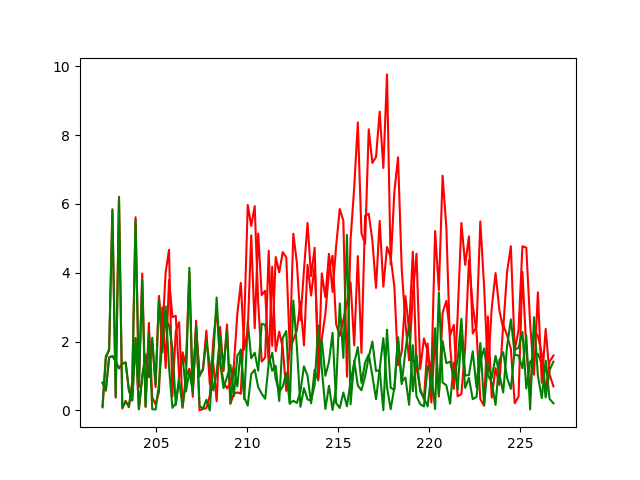

In [61]:
figure()

for i, each in enumerate(outs.sammy_outs_fit_2[-1].pw_post):

    if np.any(np.isnan(each.theo_trans)):
        key='theo_xs'
    else:
        key = 'theo_trans'
    
    norm_resid = (each.exp_xs - each[key]) / each.exp_xs_unc
    true_resid = (each.exp_xs - true_out.pw_post[i][key]) / each.exp_xs_unc
    
    print("fit/true")
    print(np.sum(norm_resid**2))
    print(np.sum(true_resid**2))

    if i > 2:
        plot(each.E, abs(norm_resid), color='r')# -true_resid)
        plot(each.E, abs(true_resid), color='g')


In [38]:
for each in norm_resid:
    print(len(each))

198
198
198
127
127


In [17]:
# np.tile([1,0], np.ceil(50/3))
# outs.sammy_outs_fit_2[-1].par_post


In [15]:
# vary1 = np.tile([0,0,1,1], int(len(outs.sammy_outs_fit_2[-1].par_post)/4))
# vary2 = np.tile([1,1,0,0], int(len(outs.sammy_outs_fit_2[-1].par_post)/4))
pattern1= [0,0,1,1]
vary1 = np.tile(pattern1, (len(outs.sammy_outs_fit_2[-1].par_post) // len(pattern1)) + 1)[:len(outs.sammy_outs_fit_2[-1].par_post)]
pattern2= [1,1,0,0]
vary2 = np.tile(pattern2, (len(outs.sammy_outs_fit_2[-1].par_post) // len(pattern2)) + 1)[:len(outs.sammy_outs_fit_2[-1].par_post)]

chi2_per_ndat = np.sum(outs.sammy_outs_fit_2[-1].chi2_post) / np.sum([len(each) for each in outs.sammy_outs_fit_2[-1].pw_post])
parameters = deepcopy(outs.sammy_outs_fit_2[-1].par_post)
tracker = 1; chi2_per_ndat_next = chi2_per_ndat
while chi2_per_ndat > np.sum(true_out.chi2_post)/np.sum([len(each) for each in true_out.pw_post]):

    # if tracker % 2 == 0:
    parameters['varyE'] = vary1
    parameters['varyGg'] = vary1
    parameters['varyGn1'] = vary1
    print("vary1")
    # else:
    sammyINPyw.resonance_ladder = parameters
    sammyout = sammy_functions.run_sammy_YW(sammyINPyw, sammy_rto_fit)
    chi2_per_ndat = np.sum(sammyout.chi2_post)/np.sum([len(each) for each in sammyout.pw_post])
    parameters = sammyout.par_post


    parameters['varyE'] = vary2
    parameters['varyGg'] = vary2
    parameters['varyGn1'] = vary2
    print("vary2")
    sammyINPyw.resonance_ladder = parameters
    sammyout = sammy_functions.run_sammy_YW(sammyINPyw, sammy_rto_fit)
    chi2_per_ndat = np.sum(sammyout.chi2_post)/np.sum([len(each) for each in sammyout.pw_post])
    parameters = sammyout.par_post

    tracker += 1
    if tracker > 10:
        break
    if chi2_per_ndat >= chi2_per_ndat_next:
        break
    chi2_per_ndat_next = chi2_per_ndat
    

vary1
Stepping until convergence
chi2 values
step fudge: ['trans1mm', 'trans3mm', 'trans6mm', 'cap1mm', 'cap2mm', 'sum', 'sum/ndat']
0    0.1  : [650.431, 401.282, 419.665, 696.761, 777.648, 2945.787, 3.4738]
Repeat step 1, 	fudge: ['trans1mm', 'trans3mm', 'trans6mm', 'cap1mm', 'cap2mm', 'sum', 'sum/ndat']
		0.1  : [663.839, 403.73, 425.492, 714.952, 795.054, 3003.067, 3.5414]
		0.02 : [652.08, 401.74, 421.49, 697.292, 778.333, 2950.935, 3.4799]
		0.004: [651.619, 401.598, 420.382, 696.278, 777.453, 2947.33, 3.4756]
		0.001: [651.463, 401.585, 420.264, 696.267, 777.444, 2947.023, 3.4753]
		0.0  : [651.464, 401.573, 420.191, 696.272, 777.449, 2946.949, 3.4752]
		0.0  : [651.477, 401.584, 420.201, 696.26, 777.444, 2946.966, 3.4752]
		0.0  : [651.467, 401.579, 420.258, 696.266, 777.438, 2947.008, 3.4752]
1    0.0  : [651.467, 401.579, 420.258, 696.266, 777.438, 2947.008, 3.4752]
Fudge below minimum value, taking solution 0
vary2
Stepping until convergence
chi2 values
step fudge: ['trans1m

In [119]:
# last [1,1,0,0] one got to 1.9066

3.4738054245283023

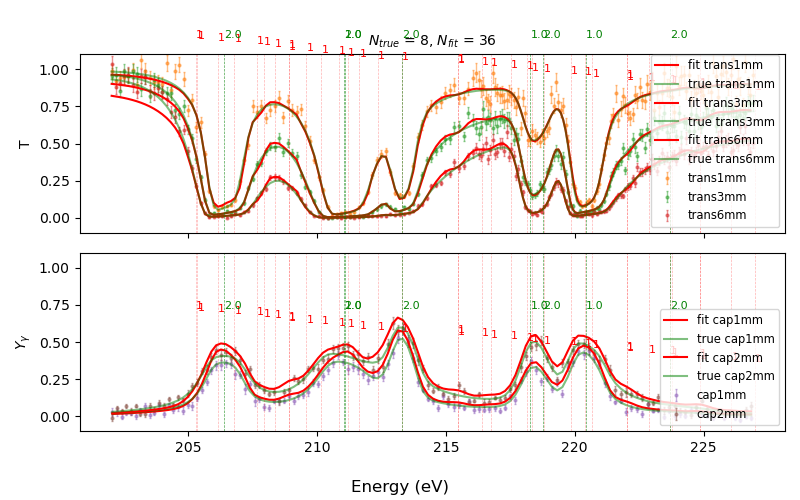

In [16]:
# figure()
# _ = hist(np.log10(sammyout.par_post.Gn1), bins=50)

fig = myplot.plot_datafits(datasets,
                     experiments,
                     fits = sammyout.pw_post,
                     fit_pars = sammyout.par_post,
                     fig_size=(8,5),
                     true=true_out.pw_post,
                     true_pars = true_out.par_post)
fig.tight_layout()

In [122]:
final_1 = deepcopy(sammyout)
if istep % 2 == 0:
    # vary = np.tile([0,0,1,1], int(len(df)/4))
    pattern = np.array([0, 0, 1, 1])
else:
    # vary =  np.tile([1,1,0,0], int(len(df)/4))
    pattern = np.array([1, 1, 0, 0])

vary = np.tile(pattern, (len(df) // len(pattern)) + 1)[:len(df)]

In [123]:
vary1 = np.tile([0,0,0,1,1,1], int(len(final_1.par_post)/6))
vary2 = np.tile([1,1,1,0,0,0], int(len(final_1.par_post)/6))
chi2_per_ndat = np.sum(final_1.chi2_post) / np.sum([len(each) for each in final_1.pw_post])
parameters = deepcopy(final_1.par_post)
tracker = 1
while chi2_per_ndat > np.sum(true_out.chi2_post)/np.sum([len(each) for each in true_out.pw_post]):

    # if tracker % 2 == 0:
    parameters['varyE'] = vary1
    parameters['varyGg'] = vary1
    parameters['varyGn1'] = vary1
    print("vary1")
    # else:
    sammyINPyw.resonance_ladder = parameters
    sammyout = sammy_functions.run_sammy_YW(sammyINPyw, sammy_rto_fit)
    chi2_per_ndat = np.sum(sammyout.chi2)/np.sum([len(each) for each in sammyout.pw_post])
    parameters = sammyout.par_post


    parameters['varyE'] = vary2
    parameters['varyGg'] = vary2
    parameters['varyGn1'] = vary2
    print("vary2")
    sammyINPyw.resonance_ladder = parameters
    sammyout = sammy_functions.run_sammy_YW(sammyINPyw, sammy_rto_fit)
    chi2_per_ndat = np.sum(sammyout.chi2)/np.sum([len(each) for each in sammyout.pw_post])
    parameters = sammyout.par_post

    tracker += 1
    if tracker > 10:
        break
    # if chi2_per_ndat >= chi2_per_ndat_next:
    #     break
    # chi2_per_ndat_next = chi2_per_ndat
    

vary1
Stepping until convergence
chi2 values
step fudge: ['trans1mm', 'trans3mm', 'trans6mm', 'cap1mm', 'cap2mm', 'sum', 'sum/ndat']
0    0.1  : [380.805, 309.777, 359.77, 232.953, 333.533, 1616.838, 1.9066]
1    0.15 : [380.468, 310.138, 359.578, 232.635, 333.431, 1616.25, 1.906]
Chi2 improvement below threshold
vary2
Stepping until convergence
chi2 values
step fudge: ['trans1mm', 'trans3mm', 'trans6mm', 'cap1mm', 'cap2mm', 'sum', 'sum/ndat']
0    0.1  : [380.474, 310.139, 359.577, 232.635, 333.431, 1616.256, 1.906]
Repeat step 1, 	fudge: ['trans1mm', 'trans3mm', 'trans6mm', 'cap1mm', 'cap2mm', 'sum', 'sum/ndat']
		0.1  : [381.56, 307.697, 376.168, 231.684, 332.845, 1629.954, 1.9221]
		0.02 : [379.936, 309.669, 360.162, 233.566, 335.913, 1619.246, 1.9095]
		0.004: [380.263, 308.539, 364.144, 234.143, 333.281, 1620.37, 1.9108]
		0.001: [381.053, 309.945, 360.594, 233.885, 334.414, 1619.891, 1.9102]
		0.0  : [380.095, 309.398, 360.445, 233.938, 335.797, 1619.673, 1.91]
		0.0  : [380.312

KeyboardInterrupt: 